___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

#### *ii. Load Dataset*

In [93]:
df = pd.read_csv('covtype.csv')

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [27]:
pd.DataFrame(df.Cover_Type.value_counts())

,Cover_Type
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
df.shape

(581012, 55)

In [6]:
df['Cover_Type'].value_counts(normalize=True)

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [9]:
# Check whether there's only one type of Soil for each row
df.drop(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Cover_Type'], axis=1).sum(axis=1).mean()

1.0

In [10]:
for i in df.columns:
    print(i)
    print('-'*len(i))
    print(df[i].value_counts().head(), '\n')

Elevation
---------
2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
Name: Elevation, dtype: int64 

Aspect
------
45     6308
0      4914
90     4677
135    3834
63     3680
Name: Aspect, dtype: int64 

Slope
-----
11    33824
10    33812
12    33217
13    32419
9     32049
Name: Slope, dtype: int64 

Horizontal_Distance_To_Hydrology
--------------------------------
30     34139
0      24603
150    20785
60     19189
67     15223
Name: Horizontal_Distance_To_Hydrology, dtype: int64 

Vertical_Distance_To_Hydrology
------------------------------
0     38665
3      9298
10     8863
7      8741
6      8590
Name: Vertical_Distance_To_Hydrology, dtype: int64 

Horizontal_Distance_To_Roadways
-------------------------------
150     1332
618     1065
900      918
390      914
1020     900
Name: Horizontal_Distance_To_Roadways, dtype: int64 

Hillshade_9am
-------------
226    11657
228    11374
230    11355
224    11210
223    10887
Name: Hillshade_9am, dtype: int64 

Hillsha

In [11]:
for i in df.columns:
    print(i)
    print('-'*len(i))
    print(df[i].corr(df.Cover_Type), '\n')

Elevation
---------
-0.2695537776305053 

Aspect
------
0.017079802032774306 

Slope
-----
0.14828540507947915 

Horizontal_Distance_To_Hydrology
--------------------------------
-0.020316621636935123 

Vertical_Distance_To_Hydrology
------------------------------
0.08166402150981603 

Horizontal_Distance_To_Roadways
-------------------------------
-0.15344975909042483 

Hillshade_9am
-------------
-0.03541500364669945 

Hillshade_Noon
--------------
-0.0964260016623319 

Hillshade_3pm
-------------
-0.04828973004683906 

Horizontal_Distance_To_Fire_Points
----------------------------------
-0.10893553610322741 

Wilderness_Area1
----------------
-0.2039132138192611 

Wilderness_Area2
----------------
-0.04805894974131527 

Wilderness_Area3
----------------
0.06684564296338862 

Wilderness_Area4
----------------
0.3231995539091437 

Soil_Type1
----------
0.09082815211746344 

Soil_Type2
----------
0.11813526031668631 

Soil_Type3
----------
0.06806445519051117 

Soil_Type4
----------
0

In [12]:
df.corr()['Cover_Type'].sort_values()

Elevation                            -0.269554
Wilderness_Area1                     -0.203913
Horizontal_Distance_To_Roadways      -0.153450
Soil_Type22                          -0.141746
Soil_Type23                          -0.135055
Soil_Type29                          -0.124933
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Soil_Type32                          -0.075562
Soil_Type24                          -0.068746
Soil_Type31                          -0.065347
Soil_Type33                          -0.062502
Hillshade_3pm                        -0.048290
Wilderness_Area2                     -0.048059
Soil_Type19                          -0.036452
Hillshade_9am                        -0.035415
Soil_Type20                          -0.028665
Soil_Type21                          -0.025400
Soil_Type12                          -0.023601
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type27                          -0.014407
Soil_Type30  

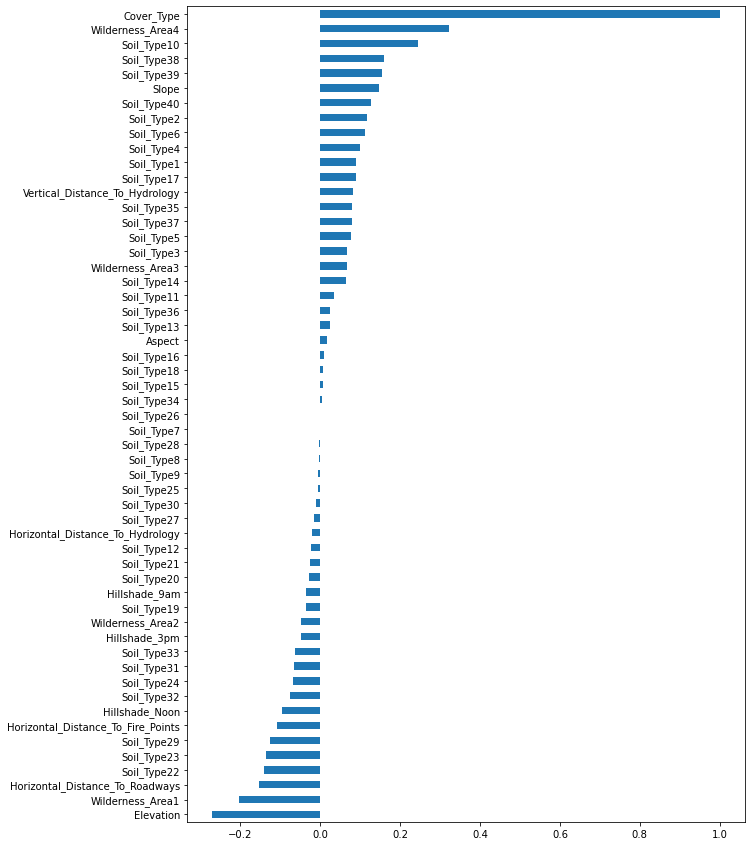

In [13]:
df.corr()['Cover_Type'].sort_values().plot.barh(figsize=(10,15));

#### Let's see the total number of each tree type:

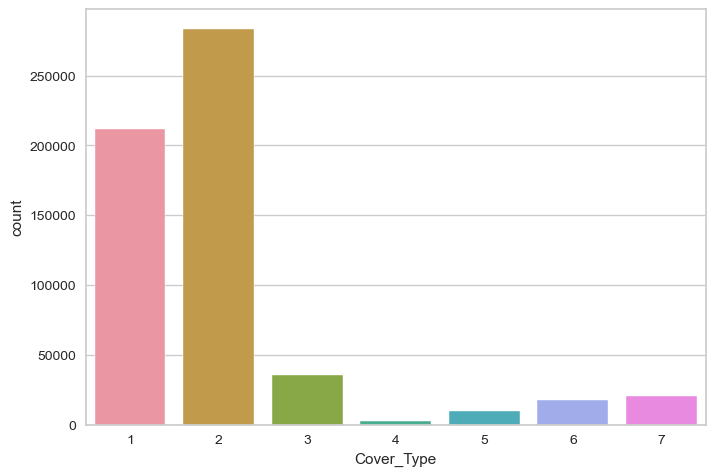

In [151]:
sns.countplot(df['Cover_Type']);

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

#### Let's see if there is any missing values in the dataset:

In [15]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

#### Let's observe the outliers of continuous features for each tree type seperately:

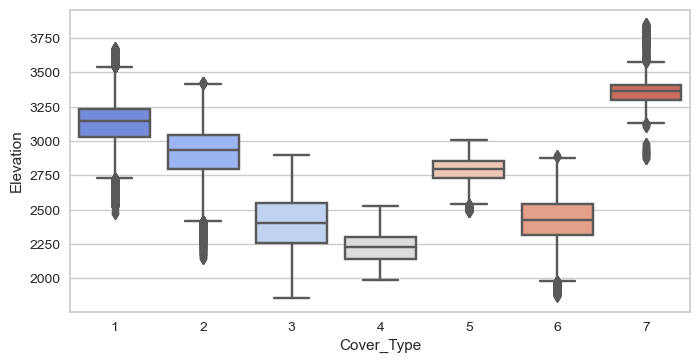

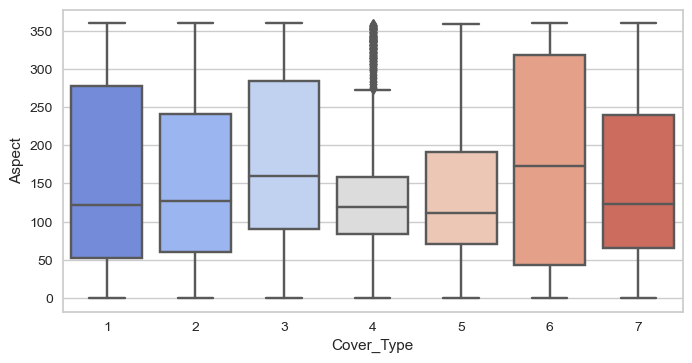

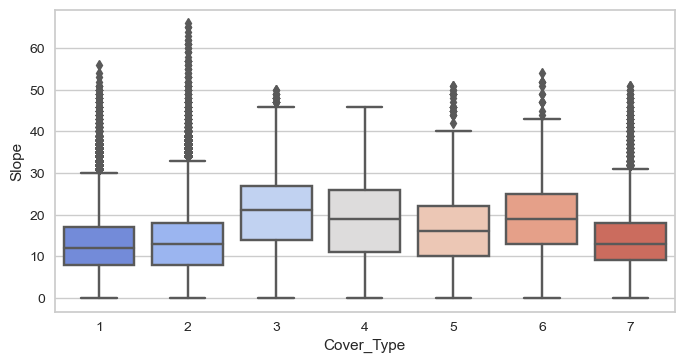

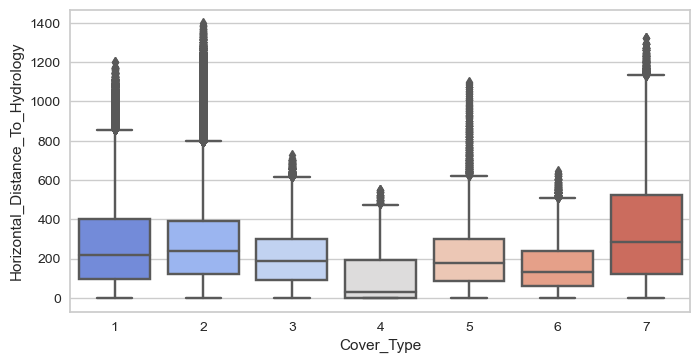

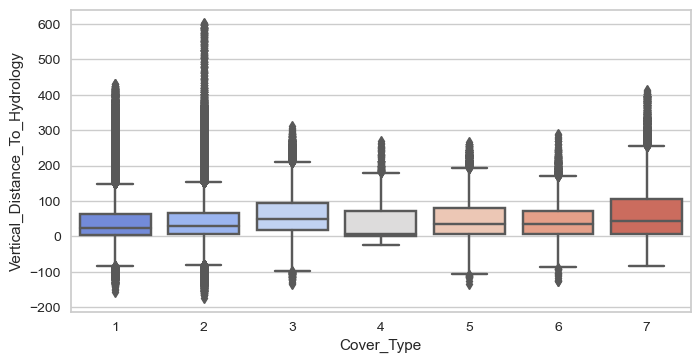

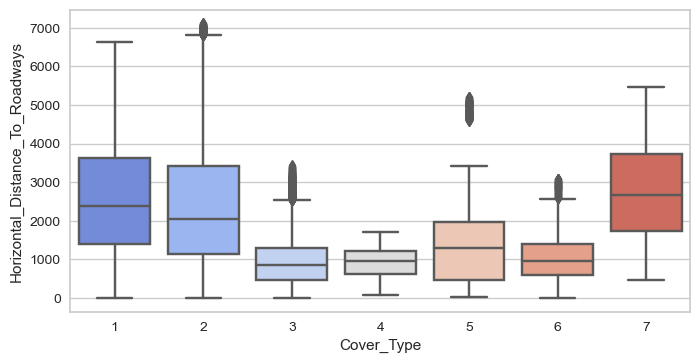

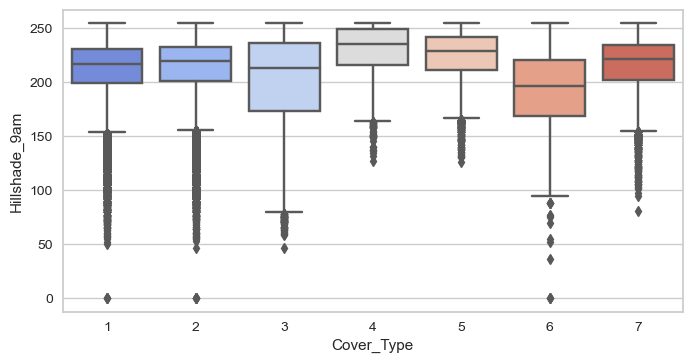

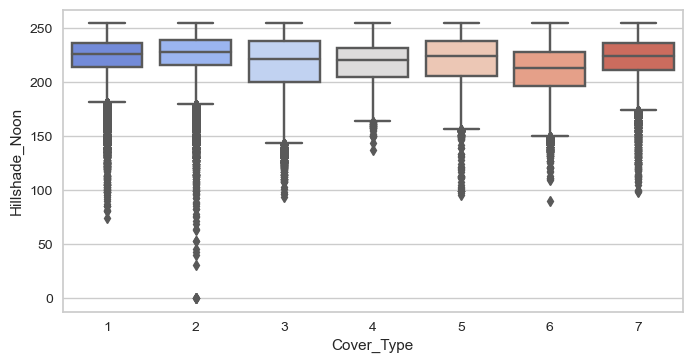

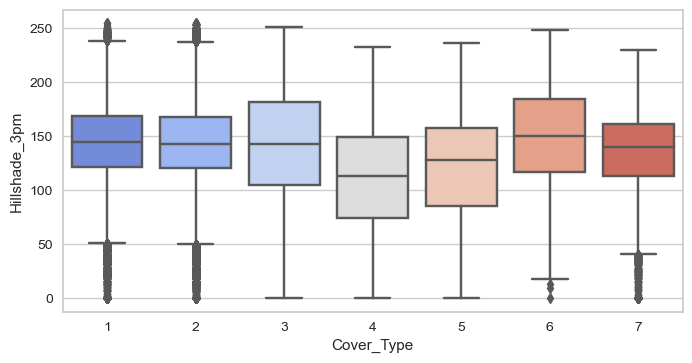

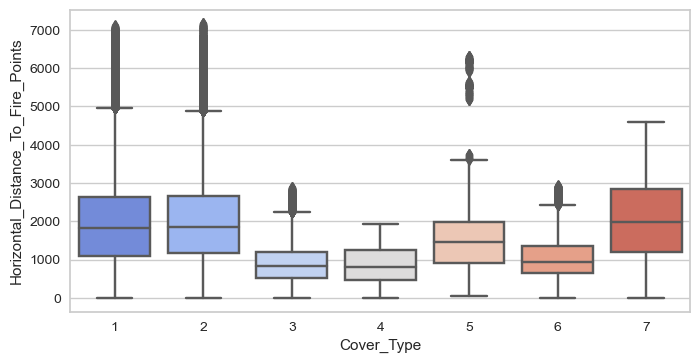

In [152]:
for i in df.columns[:10]:
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=df[i], data=df, palette="coolwarm")

#### Let's see the total number of trees living on each soil type seperately:

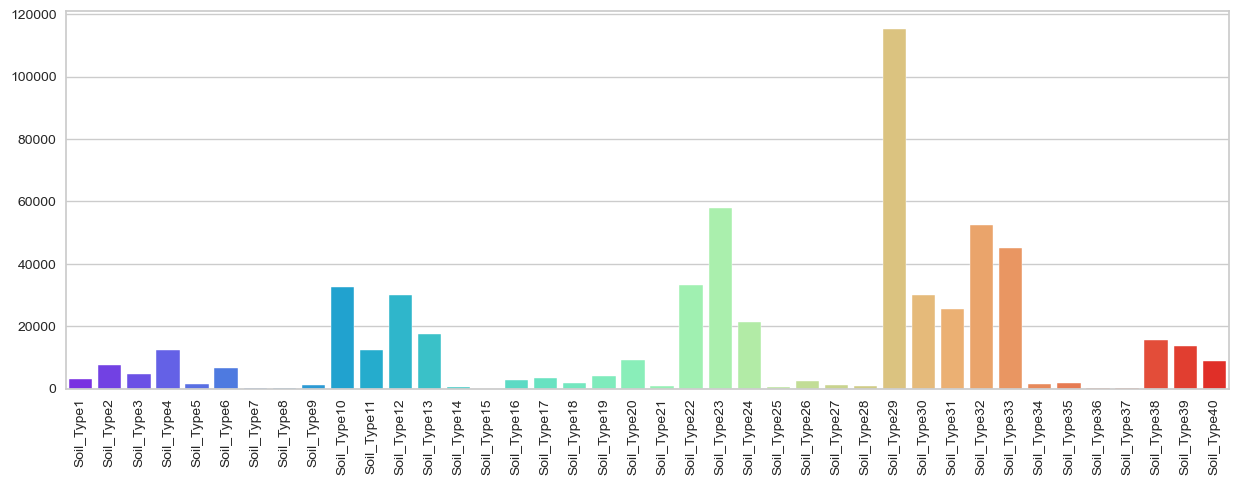

In [153]:
# Soil_Type Count
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=df.columns[14:54] ,y=[df[i].value_counts()[1] for i in df.columns[14:54]] , palette="rainbow")
plt.xticks(rotation=90);

#### Let's see the total number of trees living on each wilderness area seperately:

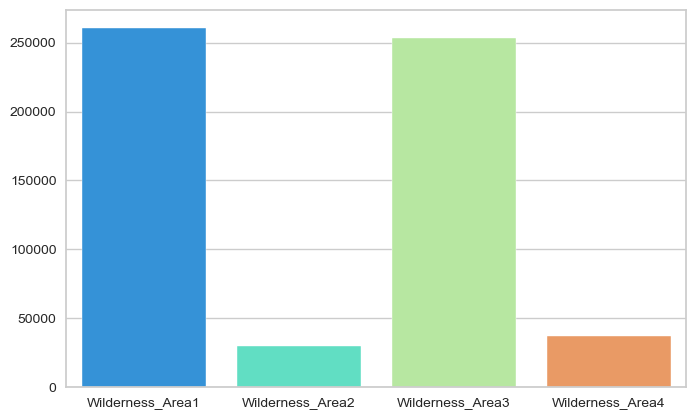

In [154]:
#Wilderness_Area Count
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=df.columns[10:14] ,y=[df[i].value_counts()[1] for i in df.columns[10:14]] , palette="rainbow");

In [21]:
df[df.Cover_Type==4]['Wilderness_Area4'].count()

2747

In [22]:
df[df.Wilderness_Area4==1]['Wilderness_Area4'].count()

36968

In [23]:
# Here it is seen that Cover_Type4 lives only in Wilderness_Area4
df[(df.Cover_Type==4) & (df.Wilderness_Area4==1)]['Wilderness_Area4'].count()

2747

#### Let's see the total number of every single tree types living on each wilderness area seperately:

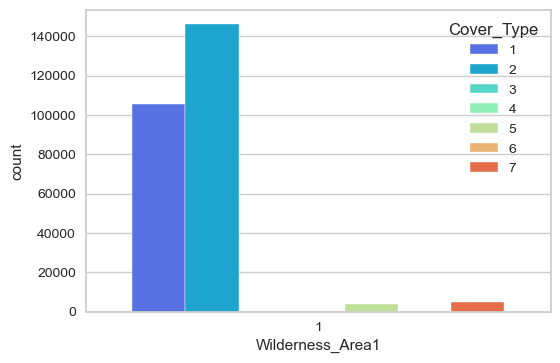

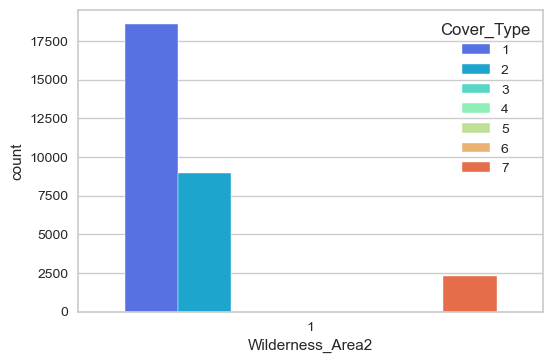

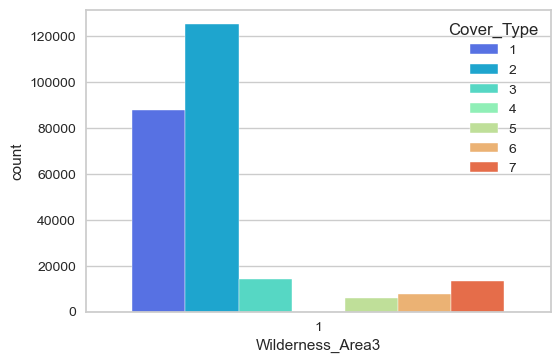

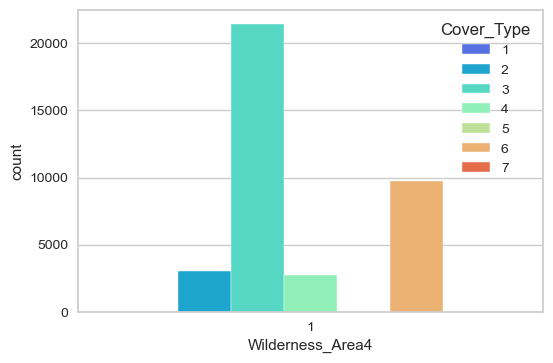

In [155]:
for i in df.columns[10:14]:
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=df[df[i]==1][i], hue=df['Cover_Type'] ,data=df, palette="rainbow")

#### Let's see which tree type live on which type of wilderness are:

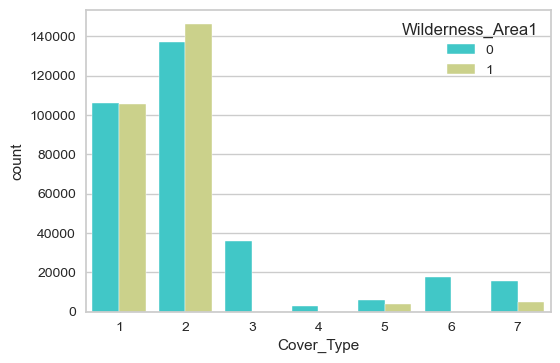

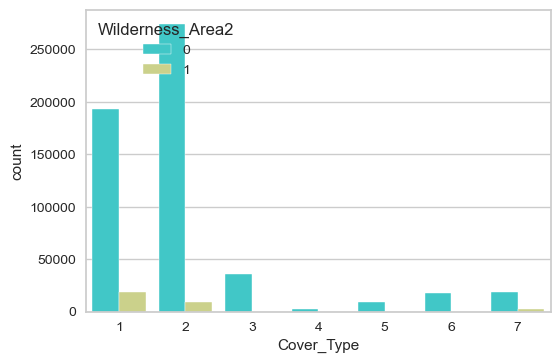

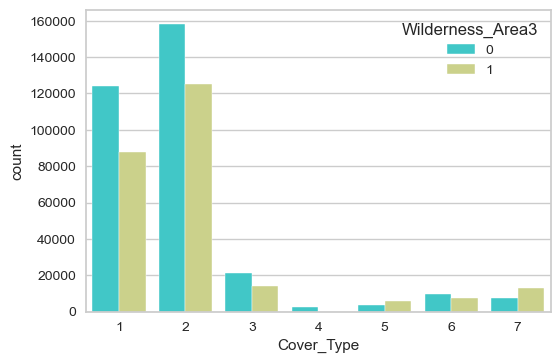

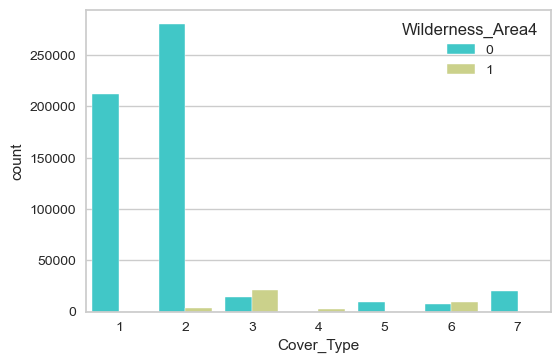

In [159]:
for i in df.columns[10:14]:
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=df['Cover_Type'], hue=df[i] ,data=df, palette="rainbow")

## PCA

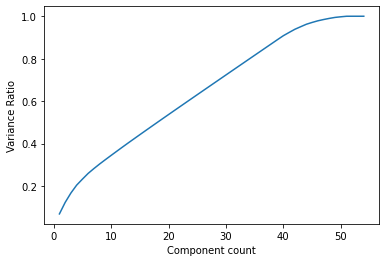

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df2=df.drop('Cover_Type', axis=1)
scaler = StandardScaler()
df_sc = StandardScaler().fit_transform(df2)
# PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_sc)

pca = PCA().fit(df_sc)
x = range(1,55)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Outo Scout)* are given below.

#### Let's observe the decrease in number of outliers by increase on z-score (from 1.5 to 3):

In [164]:
for i in df.columns[:10]:
    print('\n', 'Number of Outliers for Column:',i)
    print('-'*(32+len(i)))
    for j in np.linspace(1.5, 3.0, num=7):
        print('Z-Score '+str(j), '\t', ':',df[(df[i]<(np.percentile(df[i], 25)-iqr(df[i])*j)) | (df[i] > (np.percentile(df[i], 75)+iqr(df[i])*j))].count()[0])


 Number of Outliers for Column: Elevation
-----------------------------------------
Z-Score 1.5 	 : 15569
Z-Score 1.75 	 : 9524
Z-Score 2.0 	 : 4729
Z-Score 2.25 	 : 1548
Z-Score 2.5 	 : 225
Z-Score 2.75 	 : 0
Z-Score 3.0 	 : 0

 Number of Outliers for Column: Aspect
--------------------------------------
Z-Score 1.5 	 : 0
Z-Score 1.75 	 : 0
Z-Score 2.0 	 : 0
Z-Score 2.25 	 : 0
Z-Score 2.5 	 : 0
Z-Score 2.75 	 : 0
Z-Score 3.0 	 : 0

 Number of Outliers for Column: Slope
-------------------------------------
Z-Score 1.5 	 : 15316
Z-Score 1.75 	 : 9437
Z-Score 2.0 	 : 4074
Z-Score 2.25 	 : 2158
Z-Score 2.5 	 : 1133
Z-Score 2.75 	 : 634
Z-Score 3.0 	 : 275

 Number of Outliers for Column: Horizontal_Distance_To_Hydrology
----------------------------------------------------------------
Z-Score 1.5 	 : 14557
Z-Score 1.75 	 : 9336
Z-Score 2.0 	 : 5831
Z-Score 2.25 	 : 3540
Z-Score 2.5 	 : 1948
Z-Score 2.75 	 : 929
Z-Score 3.0 	 : 414

 Number of Outliers for Column: Vertical_Distance_To_Hyd

#### Let's visualize the decrease in number of outliers by increase in z-score (from 1.5 to 3):

In [165]:
from scipy.stats import iqr
elev={}
for j in np.linspace(1.5, 3.0, num=16):
    elev[j]= df[(df['Elevation']<(np.percentile(df['Elevation'], 25)-iqr(df['Elevation'])*j)) | (df['Elevation'] > (np.percentile(df['Elevation'], 75)+iqr(df['Elevation'])*j))].count()[0]
    
asp={}
for j in np.linspace(1.5, 3.0, num=16):
    asp[j]= df[(df['Aspect']<(np.percentile(df['Aspect'], 25)-iqr(df['Aspect'])*j)) | (df['Aspect'] > (np.percentile(df['Aspect'], 75)+iqr(df['Aspect'])*j))].count()[0]

slp={}
for j in np.linspace(1.5, 3.0, num=16):
    slp[j]= df[(df['Slope']<(np.percentile(df['Slope'], 25)-iqr(df['Slope'])*j)) | (df['Slope'] > (np.percentile(df['Slope'], 75)+iqr(df['Slope'])*j))].count()[0]

hor_hyd={}
for j in np.linspace(1.5, 3.0, num=16):
    hor_hyd[j]= df[(df['Horizontal_Distance_To_Hydrology']<(np.percentile(df['Horizontal_Distance_To_Hydrology'], 25)-iqr(df['Horizontal_Distance_To_Hydrology'])*j)) | (df['Horizontal_Distance_To_Hydrology'] > (np.percentile(df['Horizontal_Distance_To_Hydrology'], 75)+iqr(df['Horizontal_Distance_To_Hydrology'])*j))].count()[0]

ver_hyd={}
for j in np.linspace(1.5, 3.0, num=16):
    ver_hyd[j]= df[(df['Vertical_Distance_To_Hydrology']<(np.percentile(df['Vertical_Distance_To_Hydrology'], 25)-iqr(df['Vertical_Distance_To_Hydrology'])*j)) | (df['Vertical_Distance_To_Hydrology'] > (np.percentile(df['Vertical_Distance_To_Hydrology'], 75)+iqr(df['Vertical_Distance_To_Hydrology'])*j))].count()[0]

hor_road={}
for j in np.linspace(1.5, 3.0, num=16):
    hor_road[j]= df[(df['Horizontal_Distance_To_Roadways']<(np.percentile(df['Horizontal_Distance_To_Roadways'], 25)-iqr(df['Horizontal_Distance_To_Roadways'])*j)) | (df['Horizontal_Distance_To_Roadways'] > (np.percentile(df['Horizontal_Distance_To_Roadways'], 75)+iqr(df['Horizontal_Distance_To_Roadways'])*j))].count()[0]

am9={}
for j in np.linspace(1.5, 3.0, num=16):
    am9[j]= df[(df['Hillshade_9am']<(np.percentile(df['Hillshade_9am'], 25)-iqr(df['Hillshade_9am'])*j)) | (df['Hillshade_9am'] > (np.percentile(df['Hillshade_9am'], 75)+iqr(df['Hillshade_9am'])*j))].count()[0]

noon={}
for j in np.linspace(1.5, 3.0, num=16):
    noon[j]= df[(df['Hillshade_Noon']<(np.percentile(df['Hillshade_Noon'], 25)-iqr(df['Hillshade_Noon'])*j)) | (df['Hillshade_Noon'] > (np.percentile(df['Hillshade_Noon'], 75)+iqr(df['Hillshade_Noon'])*j))].count()[0]

pm3={}
for j in np.linspace(1.5, 3.0, num=16):
    pm3[j]= df[(df['Hillshade_3pm']<(np.percentile(df['Hillshade_3pm'], 25)-iqr(df['Hillshade_3pm'])*j)) | (df['Hillshade_3pm'] > (np.percentile(df['Hillshade_3pm'], 75)+iqr(df['Hillshade_3pm'])*j))].count()[0]

hor_fire={}
for j in np.linspace(1.5, 3.0, num=16):
    hor_fire[j]= df[(df['Horizontal_Distance_To_Fire_Points']<(np.percentile(df['Horizontal_Distance_To_Fire_Points'], 25)-iqr(df['Horizontal_Distance_To_Fire_Points'])*j)) | (df['Horizontal_Distance_To_Fire_Points'] > (np.percentile(df['Horizontal_Distance_To_Fire_Points'], 75)+iqr(df['Horizontal_Distance_To_Fire_Points'])*j))].count()[0]

#dis_hyd={}
#for j in np.linspace(1.5, 3.0, num=16):
#    dis_hyd[j]= df[(df['Distance_To_Hydrology']<(np.percentile(df['Distance_To_Hydrology'], 25)-iqr(df['Distance_To_Hydrology'])*j)) | (df['Distance_To_Hydrology'] > (np.percentile(df['Distance_To_Hydrology'], 75)+iqr(df['Distance_To_Hydrology'])*j))].count()[0]

lst1=[elev, asp, ver_hyd, am9, hor_fire]
lst2=[slp, hor_hyd, hor_road, noon, pm3]

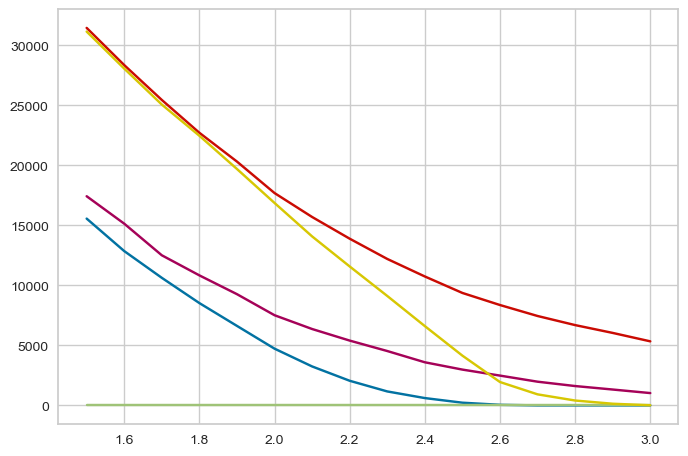

In [166]:
for i in lst1:
    sns.lineplot(x=list(i.keys()), y=list(i.values()));

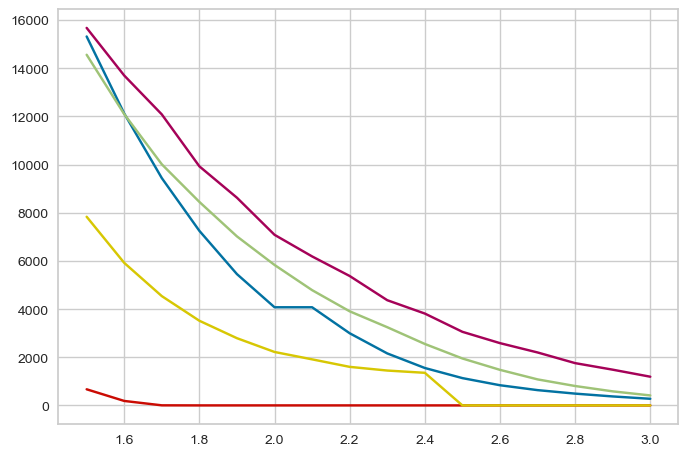

In [167]:
for i in lst2:
    sns.lineplot(x=list(i.keys()), y=list(i.values()));

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [43]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

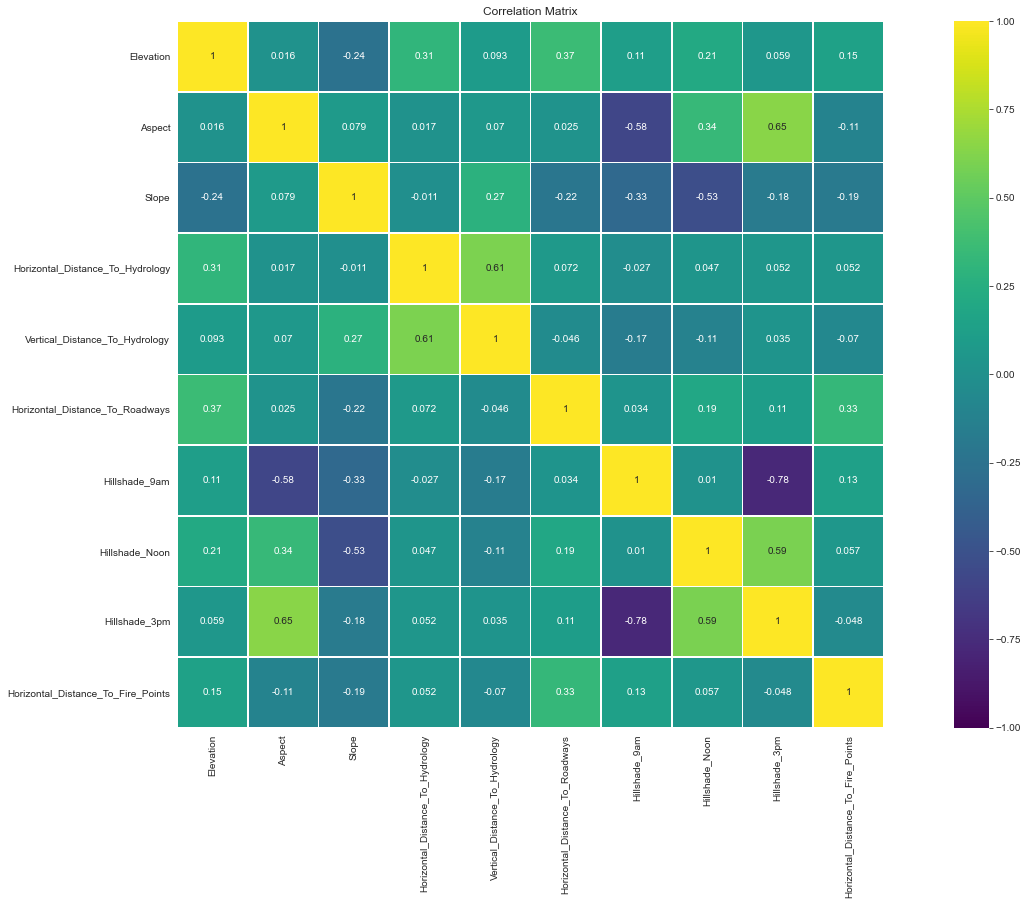

In [49]:
corr_matrix = df.iloc[:,:10].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [92]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance
0,2596,51,3,510,221,232,148,6279,1,0,...,0,0,0,0,0,0,0,0,5,66564
1,2590,56,2,390,220,235,151,6225,1,0,...,0,0,0,0,0,0,0,0,5,44980
2,2804,139,9,3180,234,238,135,6121,1,0,...,0,0,0,0,0,0,0,0,2,76049
3,2785,155,18,3090,238,238,122,6211,1,0,...,0,0,0,0,0,0,0,0,2,72488
4,2595,45,2,391,220,234,150,6172,1,0,...,0,0,0,0,0,0,0,0,5,23410


In [77]:
import sqlite3

In [94]:
with sqlite3.connect("tree_database.db") as cnnct:
    df.to_sql("covtype2", cnnct, if_exists = "replace")

In [95]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance
FROM covtype2;"""

In [96]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, 
Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, 
Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8,  Soil_Type9, Soil_Type10, 
Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, 
Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, 
Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, 
Cover_Type, Square_Hypo_Distance
FROM covtype2;"""

In [97]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [98]:
df2.to_csv("covtype3.csv", index = False)

# AFTER SQL

In [53]:
#df['Distance_To_Hydrology']=round((df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)**0.5, 0)

In [54]:
# df[['Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']]

,Distance_To_Hydrology,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology
0,258.0,258,0
1,212.0,212,-6
2,276.0,268,65
3,269.0,242,118
4,153.0,153,-1
...,...,...,...
581007,87.0,85,17
581008,68.0,67,12
581009,60.0,60,7
581010,60.0,60,5


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [99]:
df = pd.read_csv("covtype3.csv")

In [100]:
df.shape

(581012, 54)

In [101]:
X=df.drop("Cover_Type", axis=1)
y=df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [103]:
print(confusion_matrix(y_test,pred_knn), '\n', '\n')
print(classification_report(y_test,pred_knn))

[[30439 11560    18     0    44     7   300]
 [ 9990 45384   796     1   230   179    81]
 [   88  1936  4583    65    14   465     0]
 [    0    25   213   259     2    50     0]
 [  211  1168    22     0   486    12     0]
 [   32   873  1194    23    24  1327     0]
 [ 2068   637     0     0     0     0  1397]] 
 

              precision    recall  f1-score   support

           1       0.71      0.72      0.71     42368
           2       0.74      0.80      0.77     56661
           3       0.67      0.64      0.66      7151
           4       0.74      0.47      0.58       549
           5       0.61      0.26      0.36      1899
           6       0.65      0.38      0.48      3473
           7       0.79      0.34      0.48      4102

    accuracy                           0.72    116203
   macro avg       0.70      0.52      0.58    116203
weighted avg       0.72      0.72      0.71    116203



In [104]:
# Let's try the first dataset:
df = pd.read_csv('covtype.csv')

X=df.drop("Cover_Type", axis=1)
y=df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [105]:
print(confusion_matrix(y_test,pred_knn), '\n', '\n')
print(classification_report(y_test,pred_knn))

[[40991  1255     0     0    21     1   100]
 [ 1142 55280    66     0   111    46    16]
 [    2   107  6907    27     7   101     0]
 [    0     0    75   431     0    43     0]
 [   23   162    15     0  1694     5     0]
 [    4    86   142    14     5  3222     0]
 [  119    28     0     0     0     0  3955]] 
 

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     42368
           2       0.97      0.98      0.97     56661
           3       0.96      0.97      0.96      7151
           4       0.91      0.79      0.84       549
           5       0.92      0.89      0.91      1899
           6       0.94      0.93      0.94      3473
           7       0.97      0.96      0.97      4102

    accuracy                           0.97    116203
   macro avg       0.95      0.93      0.94    116203
weighted avg       0.97      0.97      0.97    116203



In [106]:
# Surprisingly we got a much better result.

In [107]:
error_rate = []

# Will take some time
for i in range(2,20,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

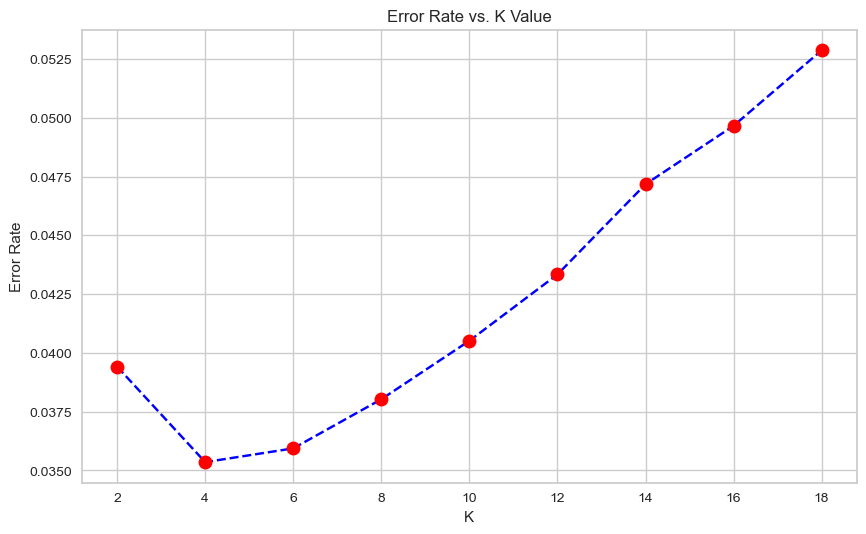

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
neighbors = np.arange(1, 7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

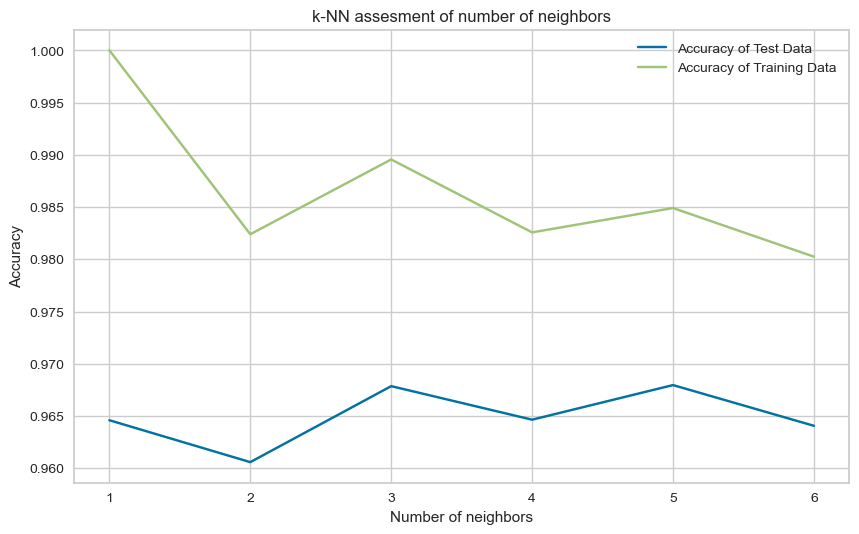

In [110]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [111]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)
y_pred_knn = knn5.predict(X_test)
knn5_f1 = f1_score(y_test, y_pred_knn, average='macro')
knn_accuracy = knn5.score(X_test,y_test)

In [112]:
knn5_f1

0.9368560167700412

In [113]:
knn_accuracy

0.9679612402433672

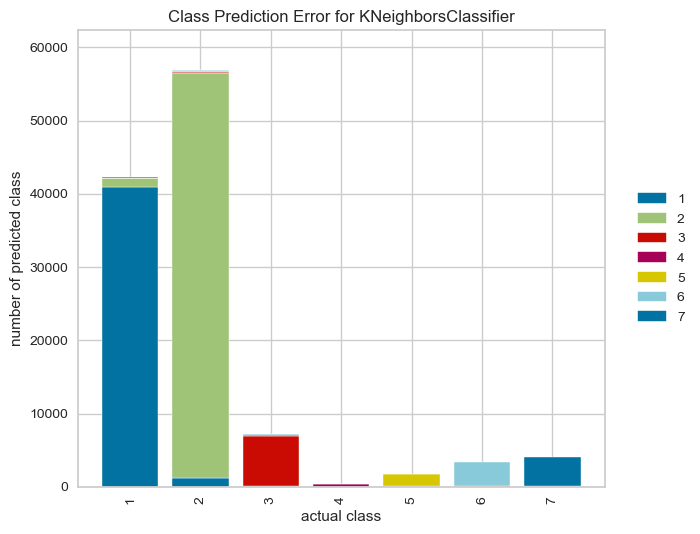

In [122]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(KNeighborsClassifier())
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show();

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_tree = dtree.predict(X_test)

In [116]:
print(confusion_matrix(y_test,pred_tree), '\n', '\n')
print(classification_report(y_test,pred_tree))

[[39808  2338     3     0    33     5   181]
 [ 2417 53709   147     0   241   110    37]
 [    0   159  6667    56    19   250     0]
 [    0     3    64   470     0    12     0]
 [   32   244    17     0  1601     5     0]
 [   11   130   272    27     3  3030     0]
 [  205    34     0     0     0     0  3863]] 
 

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.85      0.86      0.85       549
           5       0.84      0.84      0.84      1899
           6       0.89      0.87      0.88      3473
           7       0.95      0.94      0.94      4102

    accuracy                           0.94    116203
   macro avg       0.91      0.90      0.91    116203
weighted avg       0.94      0.94      0.94    116203



In [117]:
tree_accuracy = accuracy_score(pred_tree, y_test)
tree_f1 = f1_score(y_test, pred_tree, average='macro')
tree_f1

0.9055148793454785

In [118]:
tree_accuracy

0.9392872817397141

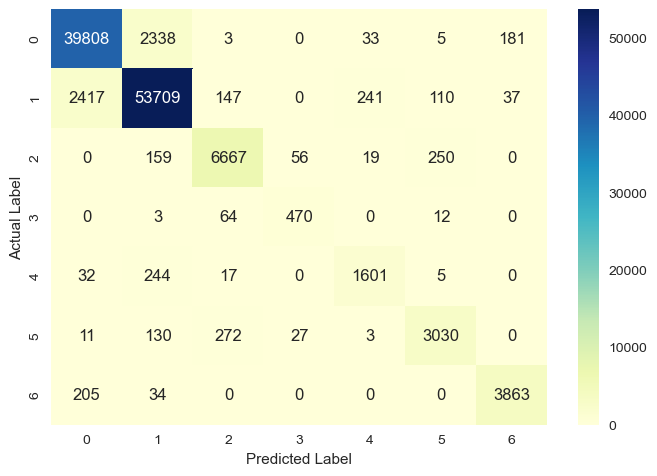

In [120]:
sns.heatmap(confusion_matrix(y_test, pred_tree), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [76]:
#dtree = DecisionTreeClassifier()
#dtree_params = {"ccp_alpha":[0, 0.01, 0.001],
#              "min_impurity_decrease":[1,2,3],
#              "min_samples_split": [2,3]}
#
#dtree_cv_model = GridSearchCV(dtree, dtree_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [77]:
#dtree_cv_model.best_params_

In [78]:
#tree_tuned = DecisionTreeClassifier(ccp_alpha = 0,             
#                                 min_impurity_decrease = 1, 
#                                 min_samples_split = 2).fit(X_train, y_train)

In [79]:
#pred_tree_tuned = dtree_tuned.predict(X_test)
#print(confusion_matrix(y_test,pred_tree_tuned), '\n', '\n')
#print(classification_report(y_test,pred_tree_tuned))

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [123]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [124]:
pred_rf = rf_model.predict(X_test)

In [125]:
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[39933  2328     5     0     7     2    93]
 [ 1269 55136   102     0    65    67    22]
 [    0   113  6875    26     7   130     0]
 [    0     0    62   465     0    22     0]
 [   26   365    21     0  1479     8     0]
 [    5    94   255    19     4  3096     0]
 [  193    26     0     0     0     0  3883]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.78      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [128]:
rf_accuracy = rf_model.score(X_test,y_test)
rfc_f1 = f1_score(y_test, pred_rf, average='macro')
rfc_f1

0.9238537666291238

In [129]:
rf_accuracy

0.9540803593711006

Text(0.5, 41.47222222222222, 'Predicted Label')

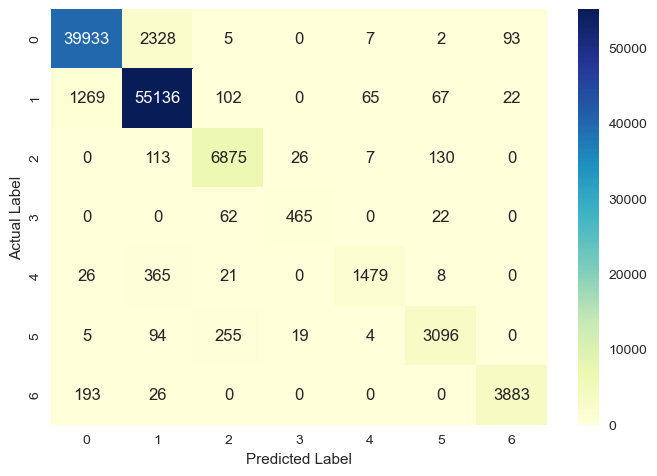

In [130]:
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [84]:
#rf=RandomForestClassifier()
#
#rf_params = {"n_estimators":[50, 100, 300],
#              "max_depth":[3,5,7],
#              "max_features": [2,4,6,8],
#              "min_samples_split": [2,4,6]}
#rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [85]:
#rf_cv_model.best_params_

In [86]:
#rf_tuned = RandomForestClassifier(max_depth = 9,             
#                                  max_features = 3, 
#                                  min_samples_split = 4, 
#                                  n_estimators = 1000).fit(X_train, y_train)

In [87]:
#pred_rf_tuned = rf_model.predict(X_test)

In [88]:
#print(confusion_matrix(y_test, pred_rf_tuned))
#print(classification_report(y_test, pred_rf_tuned))

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [131]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
pred_xg = xgb_model.predict(X_test)

In [132]:
print(confusion_matrix(y_test, pred_xg))
print(classification_report(y_test, pred_xg))

[[35246  6901     4     0    20     7   190]
 [ 5621 50438   279     1   125   167    30]
 [    0   285  6523    39     3   301     0]
 [    0     0    50   478     0    21     0]
 [   17   684    32     0  1156    10     0]
 [    7   222   439    21     1  2783     0]
 [  355    17     0     0     0     0  3730]]
              precision    recall  f1-score   support

           1       0.85      0.83      0.84     42368
           2       0.86      0.89      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.89      0.87      0.88       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.94      0.91      0.93      4102

    accuracy                           0.86    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.86      0.86      0.86    116203



In [134]:
xgb_accuracy = accuracy_score(y_test, pred_xg)
xgb_f1 = f1_score(y_test, pred_xg, average='macro')
xgb_f1

0.8528052006771423

In [135]:
xgb_accuracy

0.8636093732519814

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [137]:
from sklearn.svm import SVC, LinearSVC
model_svm = LinearSVC()
model_svm.fit(X_train,y_train)

LinearSVC()

In [138]:
pred_svm = model_svm.predict(X_test)

In [139]:
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

[[28176 12568     0     0     1   126  1497]
 [15592 39909     4    10    64   906   176]
 [    0  2880   985   187   117  2980     2]
 [    0     4   116   172    12   245     0]
 [  241  1647     0     0     0    10     1]
 [    4  1403   147    16     6  1897     0]
 [ 2695    68     0     0     0     0  1339]]
              precision    recall  f1-score   support

           1       0.60      0.67      0.63     42368
           2       0.68      0.70      0.69     56661
           3       0.79      0.14      0.23      7151
           4       0.45      0.31      0.37       549
           5       0.00      0.00      0.00      1899
           6       0.31      0.55      0.39      3473
           7       0.44      0.33      0.38      4102

    accuracy                           0.62    116203
   macro avg       0.47      0.38      0.39    116203
weighted avg       0.63      0.62      0.61    116203



In [140]:
svm_accuracy = accuracy_score(y_test, pred_svm)
svm_f1 = f1_score(y_test, pred_svm, average='macro')
svm_f1

0.3855107874098654

In [141]:
svm_accuracy

0.6237188368630758

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

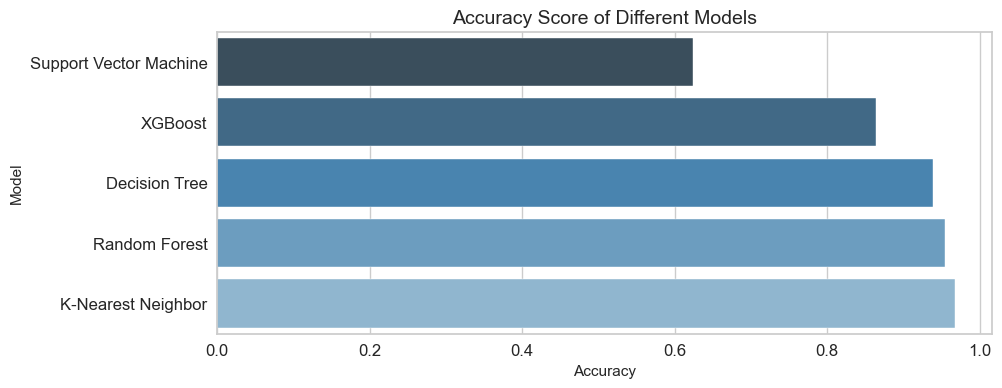

In [149]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree", "Support Vector Machine"],
                        "Accuracy": [knn_accuracy, rf_accuracy, xgb_accuracy, tree_accuracy, svm_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

# F1 Comparison

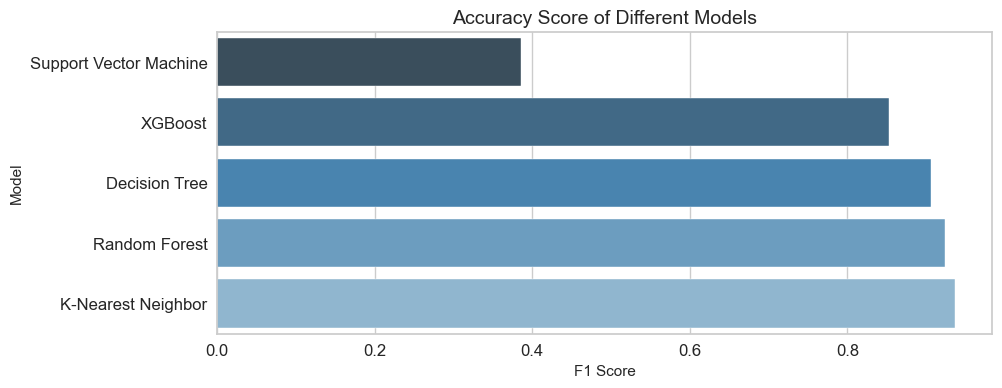

In [148]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree", "Support Vector Machine"],
                        "F1 Score": [knn5_f1, rfc_f1, xgb_f1, tree_f1, svm_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

## Result:
KNN Classifier seems to be the most suitable model for this dataset

## VISUALIZATION OF THE OPTIMUM MODEL (KNN Classifier)

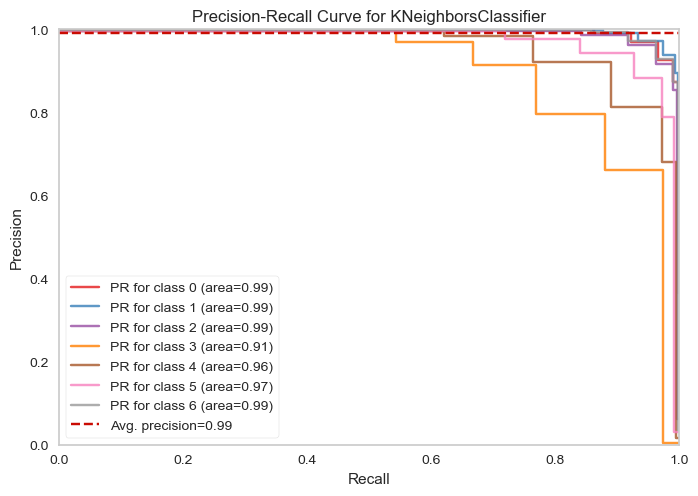

In [150]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=5),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

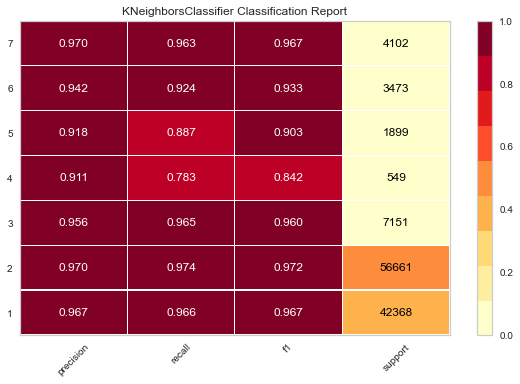

In [98]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
model = KNeighborsClassifier()
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

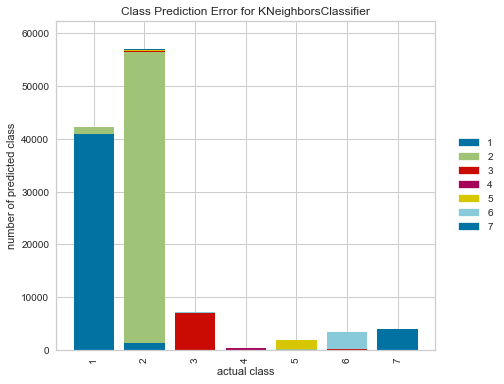

In [99]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(KNeighborsClassifier())
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___